In [1]:
%matplotlib inline
from money_model import MoneyAgent, MoneyModel
import matplotlib.pyplot as plt
import numpy as np

In [5]:
%%time

model = MoneyModel(N=50, width=10, height=10)
for i in range(100):
    model.step()

Wall time: 112 ms


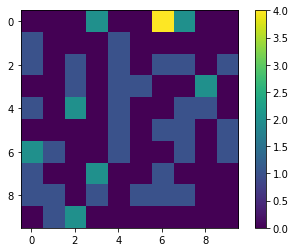

In [6]:
agent_counts = np.zeros((model.grid.width, model.grid.height))

for cell_content, x, y in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count

plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

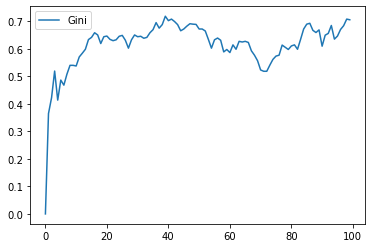

In [7]:
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

In [9]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1

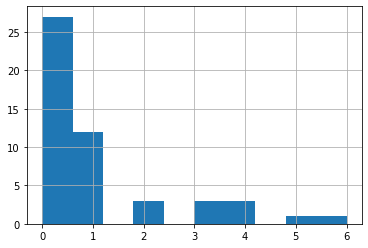

In [17]:
agent_wealth.reset_index().query("Step == 40")['Wealth'].hist()

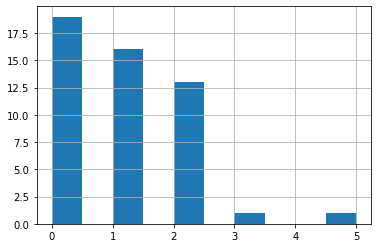

In [23]:
agent_wealth.reset_index().query("Step == 70")['Wealth'].hist()

In [ ]:
one_agent_wealth = agent_wealth.xs(20, level="AgentID")
one_agent_wealth['Wealth'].plot()